In [1]:
%load_ext autoreload
%autoreload 2

from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import sys
import os

sys.path.append(os.path.join(os.path.abspath('.'),'../../plankton'))

In [2]:
import plankton as pl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data_folder='data/leftCA1/'

coordinates = pd.read_csv(os.path.join(data_folder,'spots_w_segmentation_leftCA1_4-3.csv'))
signatures = pd.read_csv(os.path.join(data_folder,'../signatures_proteinaltlas_xiaoyan.csv'),index_col=0)

dapi_image = plt.imread(os.path.join(data_folder,'./CA1DapiBoundaries_4-3_left.tif'))
dapi_image = 1-(dapi_image/dapi_image.max())

bg_cells= np.load('./data/leftCA1/label_image.coo.npz')
cell_mask = np.zeros(bg_cells['shape'])
cell_mask[bg_cells['row'],bg_cells['col']]=bg_cells['data']

In [4]:
sdata = pl.SpatialData(genes=coordinates.gene,
                       x_coordinates=coordinates.spotX,
                       y_coordinates=coordinates.spotY,
                      pixel_maps=[pl.PixelMap(dapi_image),pl.PixelMask(cell_mask)])

(<matplotlib.collections.PathCollection at 0x7f1100992b80>, None, None)

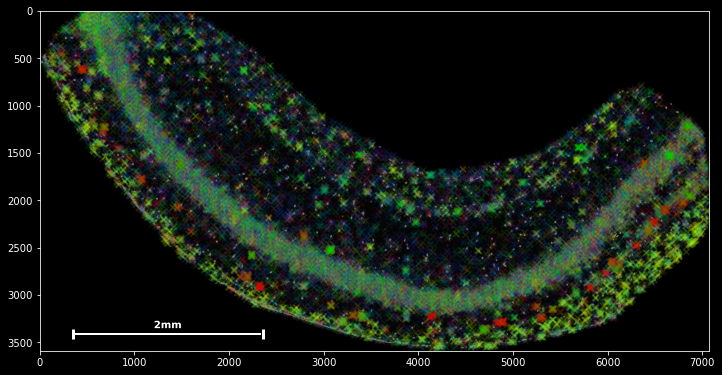

In [5]:
plt.figure(figsize=(12,10))
sdata.scatter(alpha=0.1,marker='x')

(<matplotlib.collections.PathCollection at 0x7f11008d2430>, None, None)

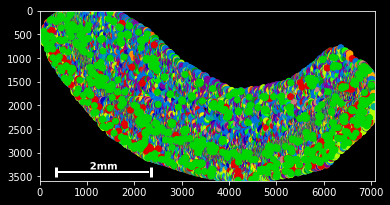

In [6]:
# %matplotlib notebook

sdata.scatter()

In [7]:
knn_neighbors=200
bandwidth=60
n_neighbors=30
metric='euclidean'
min_dist=0.03
random_state=42
zero_weight=1

_=sdata.graph.update_knn(n_neighbors=knn_neighbors)

sdata.graph.run_umap(bandwidth=bandwidth,n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=random_state,zero_weight=zero_weight)



In [8]:
# knn_neighbors=100
# bandwidth=4
# n_neighbors=30
# metric='euclidean'
# min_dist=0.0
# random_state=42
# zero_weight=1

# _=sdata.graph.update_knn(n_neighbors=knn_neighbors)

# sdata.graph.run_umap(bandwidth=bandwidth,n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=random_state,zero_weight=zero_weight)



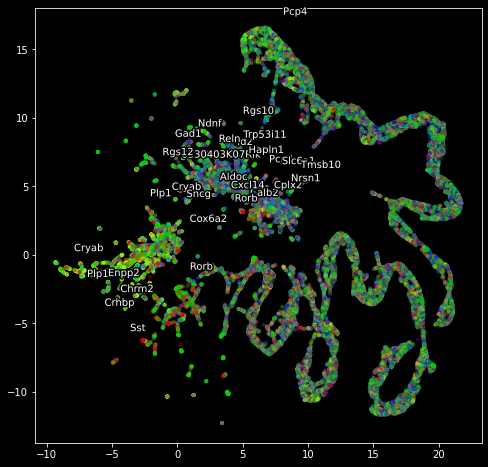

In [9]:
plt.figure(figsize=(8,8))
sdata.graph.plot_umap(text_prop='genes',alpha=0.3,marker='.',thlds_text=(0.1,0.2,0),text_distance=1.3)

In [4]:
sdata=pl.load('qian_segmemnts.pl')



Index(['g', 'x', 'y', 'gene_id', 'radiatum', 'pyramidal', 'alveus'], dtype='object')


In [11]:
# sdata['act']=(sdata.act_1|sdata.act_2|sdata.act_3|sdata.act_4)

In [19]:
# sdata.save('qian_segmemnts.pl')

In [10]:
sdata.graph.umap_js()

    'data': [{'dx': 1.0002785515320334,
              'dy': 1.000…

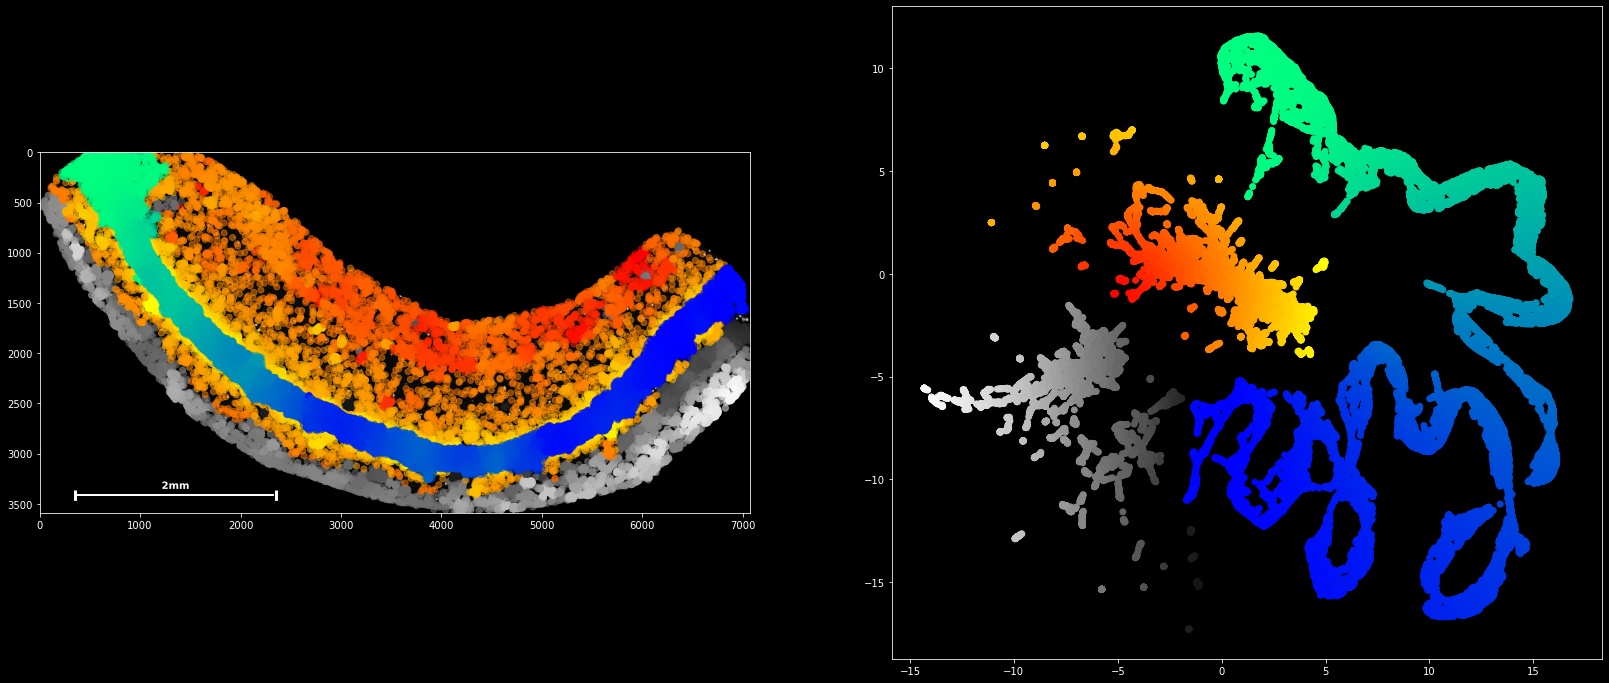

In [69]:
umap=sdata.graph.umap
centralized_umap=umap-5

plt.figure(figsize=(28,12))

dists = (centralized_umap**2).sum(1)**0.5

normalized_umap=centralized_umap/dists[:,None]
rad_umap=np.sin(normalized_umap[:,1])
rad_umap-=rad_umap.min()
rad_umap/=rad_umap.max()


calveus=-(-centralized_umap[:,0]-centralized_umap[:,1]*0)[sdata.alveus]

dists = (np.add(umap,[0,-4])**2).sum(1)**0.5
cradiatum=(dists)[sdata.radiatum]

plt.subplot(121)

sdata[sdata.alveus].scatter(c=calveus,cmap='Greys',alpha=0.5,vmin=-15,vmax=0)
sdata[sdata.radiatum].scatter(c=cradiatum,cmap='autumn',alpha=0.5)
sdata[sdata.pyramidal].scatter(c=rad_umap[sdata.pyramidal]**0.7,cmap='winter',alpha=0.5)

plt.subplot(122)

# plt.scatter(*centralized_umap[sdata.alveus].T,c=centralized_umap[:,0][sdata.alveus],cmap='spring')

plt.scatter(*centralized_umap[sdata.radiatum].T,c=cradiatum,cmap='autumn')
plt.scatter(*centralized_umap[sdata.pyramidal].T,c=rad_umap[sdata.pyramidal]**0.7,cmap='winter',)
plt.scatter(*centralized_umap[sdata.alveus].T,c=calveus,cmap='Greys',vmin=-15,vmax=0)


In [45]:
radii,coocs = sdata.stats.co_occurrence(resolution=5,max_radius=100,linear_steps=20)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95


''

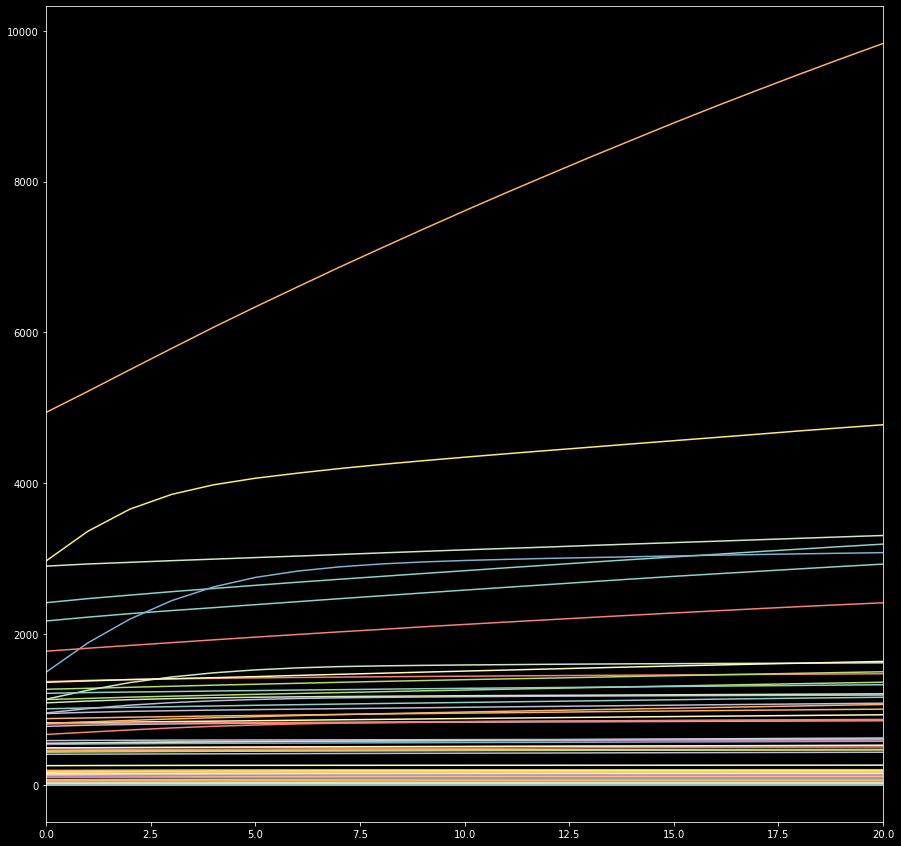

In [49]:
plt.figure(figsize=(15,15))
plt.plot(radii,np.cumsum(coocs.diagonal(),axis=0))
plt.xlim(0,20)
# plt.yscale('log')
''

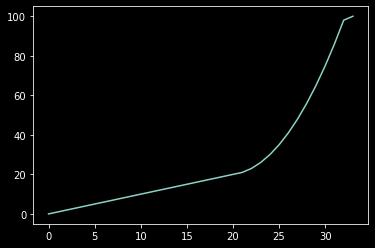

In [18]:
# plt.plot(kernels.sum(-1).sum(-1))
plt.plot(radii)

(<matplotlib.collections.PathCollection at 0x7f1068b14bb0>, None, None)

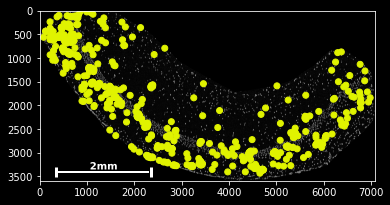

In [19]:
sdata[sdata.g=='Pvalb'].scatter()

In [43]:
coocs[1,:,0]>coocs[1,:,1]

array([False,  True,  True, False, False,  True,  True, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
        True,  True, False, False, False,  True,  True, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False,  True, False,  True, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True,  True, False,  True, False, False, False, False,  True,
       False, False,  True,  True, False,  True, False,  True, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False,  True, False, False,  True])